<h1><p style="text-align: center;">Data Analysis with Python <br>Project - 1</p><h1> - Traffic Police Stops <img src="https://docs.google.com/uc?id=17CPCwi3_VvzcS87TOsh4_U8eExOhL6Ki" class="img-fluid" width="200" height="100"> 

In this chapter, you will use a **second dataset** to explore the impact of **weather conditions** on police behavior during traffic stops. You will practice **merging** and **reshaping** datasets, assessing whether a data source is trustworthy, working with **categorical** data, and other advanced skills.

## Plotting the temperature

**INSTRUCTIONS**

*   Read ``weather.csv`` into a ``DataFrame`` named ``weather``.
*   Select the temperature columns (``TMIN``, ``TAVG``, ``TMAX``) and print their ``summary statistics`` using the ``.describe()`` method.
*   Create a **box plot** to visualize the temperature columns.
*   Display the plot.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
weather = pd.read_csv('weather.csv')

In [3]:
weather.head()

,STATION,DATE,AWND,TAVG,TMAX,TMIN,WT01,WT02,WT03,WT04,...,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,USC00379423,2005-01-01,NaN,NaN,47.0,28.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USC00379423,2005-01-02,NaN,NaN,52.0,24.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USC00379423,2005-01-03,NaN,NaN,48.0,27.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USC00379423,2005-01-04,NaN,NaN,54.0,40.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USC00379423,2005-01-05,NaN,NaN,44.0,31.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8022 entries, 0 to 8021
Data columns (total 26 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  8022 non-null   object 
 1   DATE     8022 non-null   object 
 2   AWND     4017 non-null   float64
 3   TAVG     1217 non-null   float64
 4   TMAX     8005 non-null   float64
 5   TMIN     7996 non-null   float64
 6   WT01     1777 non-null   float64
 7   WT02     221 non-null    float64
 8   WT03     227 non-null    float64
 9   WT04     119 non-null    float64
 10  WT05     360 non-null    float64
 11  WT06     25 non-null     float64
 12  WT07     79 non-null     float64
 13  WT08     404 non-null    float64
 14  WT09     69 non-null     float64
 15  WT10     2 non-null      float64
 16  WT11     3 non-null      float64
 17  WT13     1175 non-null   float64
 18  WT14     575 non-null    float64
 19  WT15     6 non-null      float64
 20  WT16     1326 non-null   float64
 21  WT17     12 no

In [5]:
weather[['TMIN', 'TAVG', 'TMAX']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
TMIN,7996.0,42.099425,17.386667,-10.0,29.0,42.0,57.0,77.0
TAVG,1217.0,52.493016,17.829792,6.0,39.0,54.0,68.0,86.0
TMAX,8005.0,61.247096,18.495043,13.0,46.0,62.0,77.0,102.0


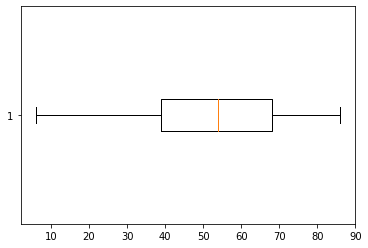

In [6]:
plt.boxplot(weather['TAVG'].dropna(), vert = False);

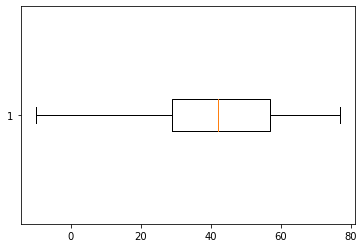

In [7]:
plt.boxplot(weather['TMIN'].dropna(), vert = False);

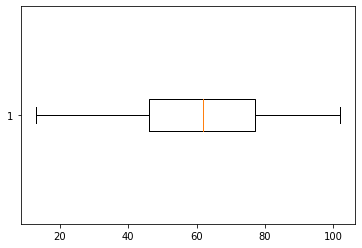

In [8]:
plt.boxplot(weather['TMAX'].dropna(), vert = False);

<AxesSubplot:>

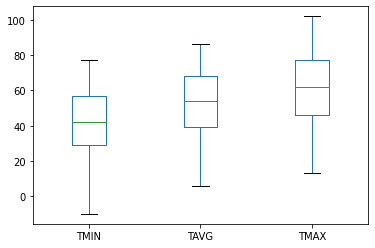

In [9]:
weather[['TMIN', 'TAVG', 'TMAX']].plot(kind='box')

***

## Plotting the temperature difference

**INSTRUCTIONS**

*   Create a new column in the ``weather`` ``DataFrame`` named ``TDIFF`` that represents the difference between the maximum and minimum temperatures.
*   Print the summary statistics for ``TDIFF`` using the ``.describe()`` method.
*   Create a histogram with ``20 bins`` to visualize ``TDIFF``.
*   Display the plot.

In [10]:
weather['TDIFF'] = weather['TMAX'] - weather['TMIN']

In [11]:
weather[['TDIFF']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
TDIFF,7994.0,19.149237,7.009716,-25.0,14.0,19.0,24.0,48.0


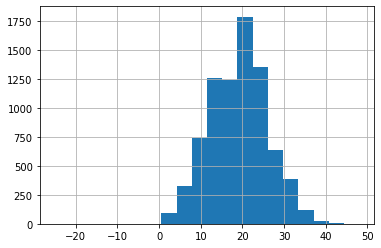

In [12]:
weather['TDIFF'].hist(bins = 20);

<AxesSubplot:ylabel='Frequency'>

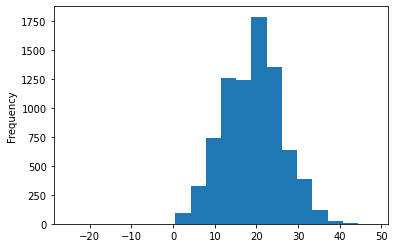

In [13]:
weather['TDIFF'].plot.hist(bins = 20)

***

## Counting bad weather conditions

The ``weather`` ``DataFrame`` contains ``20`` columns that start with ``'WT'``, each of which represents a bad weather condition. For example:

*   ``WT05`` indicates ``"Hail"``
*   ``WT11`` indicates ``"High or damaging winds"``
*   ``WT17`` indicates ``"Freezing rain"``

For every row in the dataset, each ``WT`` column contains either a ``1`` (meaning the condition was present that day) or ``NaN`` (meaning the condition was not present).

In this exercise, you'll quantify ``"how bad"`` the weather was each day by counting the number of ``1`` values in each row.

**INSTRUCTIONS**

*   Copy the columns ``WT01`` through ``WT22`` from ``weather`` to a new ``DataFrame`` named ``WT``.
*   Calculate the sum of each row in ``WT``, and store the results in a new weather column named ``bad_conditions``.
*   Replace any ``missing values`` in ``bad_conditions`` with a ``0``. (This has been done for you.)
*   Create a **histogram** to visualize ``bad_conditions``, and then display the plot.

In [14]:
WT = weather[['WT01', 'WT02',
       'WT03', 'WT04', 'WT05', 'WT06', 'WT07', 'WT08', 'WT09', 'WT10', 'WT11',
       'WT13', 'WT14', 'WT15', 'WT16', 'WT17', 'WT18', 'WT19', 'WT21', 'WT22']]

In [15]:
WT.sum(axis = 1)

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
8017    1.0
8018    0.0
8019    3.0
8020    2.0
8021    1.0
Length: 8022, dtype: float64

In [16]:
weather['bad_conditions'] = WT.sum(axis = 1)

In [17]:
weather['bad_conditions'] = weather['bad_conditions'].astype('int')

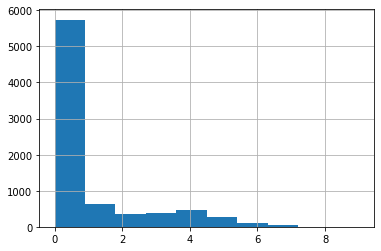

In [18]:
weather['bad_conditions'].hist();

In [19]:
weather['bad_conditions'].value_counts(dropna = False)

0    5738
1     628
4     476
3     380
2     368
5     282
6     101
7      41
9       4
8       4
Name: bad_conditions, dtype: int64

***

## Rating the weather conditions

In the previous exercise, you counted the number of bad weather conditions each day. In this exercise, you'll use the counts to create a *rating system** for the weather.

The counts range from ``0`` to ``9``, and should be converted to ratings as follows:

*   Convert ``0`` to ``'good'``
*   Convert ``1`` through ``4`` to ``'bad'``
*   Convert ``5`` through ``9`` to ``'worse'``

**INSTRUCTIONS**

*   Count the **unique** values in the ``bad_conditions`` column and sort the ``index``. 
*   Create a ``dictionary`` called ``mapping`` that maps the ``bad_conditions`` integers to strings as specified above.
*   Convert the ``bad_conditions`` integers to strings using the ``mapping`` and store the results in a new column called ``rating``.
*   Count the **unique** values in ``rating`` to verify that the integers were properly converted to strings.

In [20]:
weather['bad_conditions'].nunique()

10

In [21]:
weather['bad_conditions'].sort_index()

0       0
1       0
2       0
3       0
4       0
       ..
8017    1
8018    0
8019    3
8020    2
8021    1
Name: bad_conditions, Length: 8022, dtype: int64

In [22]:
rate_system = {0 : 'good', 1 : 'bad', 2 : 'bad', 3 : 'bad', 4 : 'bad', 5 : 'worse', 6 : 'worse', 7 : 'worse',
               8 : 'worse', 9 : 'worse'}

In [23]:
# weather['bad_conditions'] = [rate_system[item] for item in weather['bad_conditions']]

In [24]:
weather['rating'] = weather['bad_conditions'].map(rate_system)

In [25]:
# weather = weather.astype({'bad_conditions' : 'string'}, copy = False)

In [26]:
# weather['rating'] = weather['bad_conditions']

In [27]:
weather = weather.astype({'rating' : 'string'}, copy = False)

In [28]:
del weather['bad_conditions']

In [29]:
weather['rating'].unique()

<StringArray>
['good', 'bad', 'worse']
Length: 3, dtype: string

In [30]:
weather['rating'].value_counts()

good     5738
bad      1852
worse     432
Name: rating, dtype: Int64

***

## Changing the data type to category

Since the ``rating`` column only has a few possible values, you'll change its data type to ``category`` in order to store the data more efficiently. You'll also specify a logical order for the categories, which will be useful for future exercises.

**INSTRUCTIONS**

*   Create a ``list`` object called ``cats`` that lists the weather ratings in a logical order: ``'good'``, ``'bad'``, ``'worse'``.
*   Change the data type of the ``rating`` column from ``object`` to ``category``. Make sure to use the ``cats list`` to define the category ordering.
*   Examine the ``head`` of the ``rating`` column to confirm that the categories are logically ordered.

In [31]:
cats = ['good', 'bad', 'worse']

In [32]:
weather['rating'] = pd.Categorical(weather['rating'], categories = cats, ordered = True)

In [33]:
weather['rating'].head()

0    good
1    good
2    good
3    good
4    good
Name: rating, dtype: category
Categories (3, object): ['good' < 'bad' < 'worse']

In [34]:
weather['rating'].min()

'good'

In [35]:
weather['rating'].max()

'worse'

In [36]:
weather['rating'].sort_values()

0        good
3832     good
3831     good
3830     good
3829     good
        ...  
4853    worse
4852    worse
4851    worse
4871    worse
4010    worse
Name: rating, Length: 8022, dtype: category
Categories (3, object): ['good' < 'bad' < 'worse']

***

## Preparing the DataFrames

In this exercise, you'll prepare the **traffic stop** and **weather rating** ``DataFrames`` so that they're ready to be merged:

With the ``ri`` ``DataFrame``, you'll move the ``stop_datetime`` index to a ``column`` since the index will be lost during the merge.

With the ``weather`` ``DataFrame``, you'll select the ``DATE`` and ``rating`` columns and put them in a new ``DataFrame``.

**INSTRUCTIONS**

* Reset the ``index`` of the ``ri`` ``DataFrame``.

* Examine the ``head`` of ``ri`` to verify that ``stop_datetime`` is now a ``DataFrame`` column, 
and the ``index`` is now the default ``integer`` index.

* Create a new ``DataFrame`` named ``weather_rating`` that contains only the ``DATE`` and ``rating`` columns from the ``weather`` ``DataFrame``.

* Examine the ``head`` of ``weather_rating`` to verify that it contains the proper columns.

> Before starting your work from this part of this chapter **repeat the steps which you did in the first chapter for preparing the ``ri`` data.** Continue to this chapter based on where you were in the end of the first chapter.

In [37]:
ri = pd.read_csv('work_area.csv', low_memory = False, index_col = 0)

In [38]:
ri.reset_index(inplace = True)

In [39]:
ri.head()

,stop_datetime,id,stop_date,stop_time,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,...,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district
0,2005-01-02 01:55:00,RI-2005-00001,2005-01-02,01:55,Zone K1,600,M,1985.0,20.0,W,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1
1,2005-01-02 20:30:00,RI-2005-00002,2005-01-02,20:30,Zone X4,500,M,1987.0,18.0,W,...,False,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4
2,2005-01-04 12:55:00,RI-2005-00004,2005-01-04,12:55,Zone X4,500,M,1986.0,19.0,W,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
3,2005-01-06 01:30:00,RI-2005-00005,2005-01-06,01:30,Zone X4,500,M,1978.0,27.0,B,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
4,2005-01-12 08:05:00,RI-2005-00006,2005-01-12,08:05,Zone X1,000,M,1973.0,32.0,B,...,False,NaN,NaN,False,Citation,False,30+ Min,True,False,Zone X1


In [40]:
weather_rating = pd.DataFrame()

In [41]:
weather_rating = weather[['DATE', 'rating']]

In [42]:
weather_rating.head()

,DATE,rating
0,2005-01-01,good
1,2005-01-02,good
2,2005-01-03,good
3,2005-01-04,good
4,2005-01-05,good


In [43]:
weather_rating.shape

(8022, 2)

In [44]:
ri.shape

(480584, 23)

In [45]:
weather_rating['DATE'].nunique()

4017

In [46]:
ri['stop_date'].nunique()

3803

In [47]:
ri['stop_date']

0         2005-01-02
1         2005-01-02
2         2005-01-04
3         2005-01-06
4         2005-01-12
             ...    
480579    2015-12-31
480580    2015-12-31
480581    2015-12-31
480582    2015-12-31
480583    2015-12-31
Name: stop_date, Length: 480584, dtype: object

In [48]:
weather_rating['DATE']

0       2005-01-01
1       2005-01-02
2       2005-01-03
3       2005-01-04
4       2005-01-05
           ...    
8017    2015-12-27
8018    2015-12-28
8019    2015-12-29
8020    2015-12-30
8021    2015-12-31
Name: DATE, Length: 8022, dtype: object

***

## Merging the DataFrames

Merging the DataFrames
In this exercise, you'll ``merge`` the ``ri`` and ``weather_rating`` ``DataFrames`` into a new ``DataFrame``, ``ri_weather``.

The ``DataFrames`` will be joined using the ``stop_date`` column from ``ri`` and the ``DATE`` column from ``weather_rating``. Thankfully the date formatting matches exactly, which is not always the case!

Once the merge is complete, you'll set ``stop_datetime`` as the index, which is the column you saved in the previous exercise.

Examine the shape of the ``ri`` ``DataFrame``.
``Merge`` the ``ri`` and ``weather_rating`` ``DataFrames`` using a ``left join``.
Examine the ``shape`` of ``ri_weather`` to confirm that it has two more columns but the same number of rows as ``ri``.
Replace the ``index`` of ``ri_weather`` with the ``stop_datetime`` column.

***

In [49]:
ri_weather = pd.merge(ri, weather_rating, left_on = 'stop_date', right_on = 'DATE', how = 'left')

In [50]:
ri_weather.set_index('stop_datetime', inplace = True)

In [51]:
ri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480584 entries, 0 to 480583
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   stop_datetime       480584 non-null  object 
 1   id                  480584 non-null  object 
 2   stop_date           480584 non-null  object 
 3   stop_time           480584 non-null  object 
 4   location_raw        480584 non-null  object 
 5   police_department   480584 non-null  object 
 6   driver_gender       480584 non-null  object 
 7   driver_age_raw      480583 non-null  float64
 8   driver_age          478946 non-null  float64
 9   driver_race_raw     480584 non-null  object 
 10  driver_race         480584 non-null  object 
 11  violation_raw       480584 non-null  object 
 12  violation           480584 non-null  object 
 13  search_conducted    480584 non-null  bool   
 14  search_type_raw     17762 non-null   object 
 15  search_type         17762 non-null

In [52]:
ri_weather.info()

<class 'pandas.core.frame.DataFrame'>
Index: 959952 entries, 2005-01-02 01:55:00 to 2015-12-31 23:48:00
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   id                  959952 non-null  object  
 1   stop_date           959952 non-null  object  
 2   stop_time           959952 non-null  object  
 3   location_raw        959952 non-null  object  
 4   police_department   959952 non-null  object  
 5   driver_gender       959952 non-null  object  
 6   driver_age_raw      959950 non-null  float64 
 7   driver_age          956677 non-null  float64 
 8   driver_race_raw     959952 non-null  object  
 9   driver_race         959952 non-null  object  
 10  violation_raw       959952 non-null  object  
 11  violation           959952 non-null  object  
 12  search_conducted    959952 non-null  bool    
 13  search_type_raw     35484 non-null   object  
 14  search_type         35484 non-null   objec

In [53]:
ri_weather.head()

,id,stop_date,stop_time,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,...,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district,DATE,rating
stop_datetime,,,,,,,,,,,,,,,,,,,,,
2005-01-02 01:55:00,RI-2005-00001,2005-01-02,01:55,Zone K1,600,M,1985.0,20.0,W,White,...,NaN,False,Citation,False,0-15 Min,False,False,Zone K1,2005-01-02,good
2005-01-02 01:55:00,RI-2005-00001,2005-01-02,01:55,Zone K1,600,M,1985.0,20.0,W,White,...,NaN,False,Citation,False,0-15 Min,False,False,Zone K1,2005-01-02,bad
2005-01-02 20:30:00,RI-2005-00002,2005-01-02,20:30,Zone X4,500,M,1987.0,18.0,W,White,...,NaN,False,Citation,False,16-30 Min,False,False,Zone X4,2005-01-02,good
2005-01-02 20:30:00,RI-2005-00002,2005-01-02,20:30,Zone X4,500,M,1987.0,18.0,W,White,...,NaN,False,Citation,False,16-30 Min,False,False,Zone X4,2005-01-02,bad
2005-01-04 12:55:00,RI-2005-00004,2005-01-04,12:55,Zone X4,500,M,1986.0,19.0,W,White,...,NaN,False,Citation,False,0-15 Min,False,False,Zone X4,2005-01-04,good


In [54]:
weather_rating.head()

,DATE,rating
0,2005-01-01,good
1,2005-01-02,good
2,2005-01-03,good
3,2005-01-04,good
4,2005-01-05,good


## Comparing arrest rates by weather rating

Do police officers arrest drivers more often when the weather is bad? Find out below!

- **First**, you'll calculate the **overall arrest rate**.

- **Then**, you'll calculate the **arrest rate** for each of the **weather ratings** you previously assigned.

- **Finally**, you'll add **violation type** as a second factor in the analysis, to see if that accounts for any differences in the arrest rate.

Since you previously defined a logical order for the weather categories, ``good < bad < worse``, they will be sorted that way in the results.

In [55]:
ri_weather['is_arrested'].mean()

0.0345715202426788

In [56]:
ri_weather.groupby('rating')['is_arrested'].mean()

rating
good     0.034080
bad      0.035226
worse    0.039360
Name: is_arrested, dtype: float64

In [57]:
ri_weather.groupby(['violation', 'rating'])[['is_arrested']].mean()

is_arrested
violation           rating             
Equipment           good       0.059125
                    bad        0.059581
                    worse      0.094373
Moving violation    good       0.056805
                    bad        0.058081
                    worse      0.062249
Other               good       0.080682
                    bad        0.084950
                    worse      0.058704
Registration/plates good       0.083238
                    bad        0.092634
                    worse      0.098673
Seat belt           good       0.026339
                    bad        0.028795
                    worse      0.000000
Speeding            good       0.013494
                    bad        0.013348
                    worse      0.016600

***

## Selecting From a mult-indexed Series

The output of a single ``.groupby()`` operation on multiple columns is a ``Series`` with a ``MultiIndex``. Working with this type of object is similar to working with a ``DataFrame``:

The ``outer`` index level is like the ``DataFrame`` rows.
The ``inner`` index level is like the ``DataFrame`` columns.
In this exercise, you'll practice accessing data from a multi-indexed ``Series`` using the ``.loc[]`` accessor.

**INSTRUCTIONS**

- Save the output of the ``.groupby()`` operation from the last exercise as a new object, ``arrest_rate``.
- Print the ``arrest_rate`` ``Series`` and examine it.
- Print the arrest rate for ``moving violations`` in bad weather.
- Print the arrest rates for ``speeding violations`` in all three weather conditions.

In [58]:
arrest_rate = ri_weather.groupby(['violation', 'rating'])['is_arrested'].mean()

In [59]:
arrest_rate

violation            rating
Equipment            good      0.059125
                     bad       0.059581
                     worse     0.094373
Moving violation     good      0.056805
                     bad       0.058081
                     worse     0.062249
Other                good      0.080682
                     bad       0.084950
                     worse     0.058704
Registration/plates  good      0.083238
                     bad       0.092634
                     worse     0.098673
Seat belt            good      0.026339
                     bad       0.028795
                     worse     0.000000
Speeding             good      0.013494
                     bad       0.013348
                     worse     0.016600
Name: is_arrested, dtype: float64

In [60]:
arrest_rate.loc['Moving violation']['bad']

0.0580814717477004

In [61]:
arrest_rate['Speeding']

rating
good     0.013494
bad      0.013348
worse    0.016600
Name: is_arrested, dtype: float64

In [62]:
arrest_rate['Moving violation']['bad']

0.0580814717477004

***

## Reshaping the arrest rate data

In this exercise, you'll start by **reshaping** the ``arrest_rate`` ``Series`` into a ``DataFrame``. This is a useful step when working with any multi-indexed ``Series``, since it enables you to access the full range of ``DataFrame`` methods.

Then, you'll create the exact same ``DataFrame`` using a ``pivot table``. This is a great example of how pandas often gives you more than one way to reach the same result!

**INSTRUCTIONS**

- ``unstack`` the ``arrest_rate`` ``Series`` to ``reshape`` it into a ``DataFrame``.
- Create the exact same ``DataFrame`` using a ``pivot table``! Each of the three ``.pivot_table()`` parameters should be specified as one of the ``ri_weather`` columns.

In [64]:
arrest_rate

violation            rating
Equipment            good      0.059125
                     bad       0.059581
                     worse     0.094373
Moving violation     good      0.056805
                     bad       0.058081
                     worse     0.062249
Other                good      0.080682
                     bad       0.084950
                     worse     0.058704
Registration/plates  good      0.083238
                     bad       0.092634
                     worse     0.098673
Seat belt            good      0.026339
                     bad       0.028795
                     worse     0.000000
Speeding             good      0.013494
                     bad       0.013348
                     worse     0.016600
Name: is_arrested, dtype: float64

In [65]:
arrest_rate.unstack()

rating,good,bad,worse
violation,,,
Equipment,0.059125,0.059581,0.094373
Moving violation,0.056805,0.058081,0.062249
Other,0.080682,0.084950,0.058704
Registration/plates,0.083238,0.092634,0.098673
Seat belt,0.026339,0.028795,0.000000
Speeding,0.013494,0.013348,0.016600


In [67]:
ri_weather.groupby(['violation', 'rating'])['is_arrested'].mean()

violation            rating
Equipment            good      0.059125
                     bad       0.059581
                     worse     0.094373
Moving violation     good      0.056805
                     bad       0.058081
                     worse     0.062249
Other                good      0.080682
                     bad       0.084950
                     worse     0.058704
Registration/plates  good      0.083238
                     bad       0.092634
                     worse     0.098673
Seat belt            good      0.026339
                     bad       0.028795
                     worse     0.000000
Speeding             good      0.013494
                     bad       0.013348
                     worse     0.016600
Name: is_arrested, dtype: float64

In [68]:
arrest_rate2 = ri_weather.pivot_table(values = 'is_arrested', index = 'violation', columns = 'rating')
# default aggfunc is mean.

In [69]:
arrest_rate2

rating,good,bad,worse
violation,,,
Equipment,0.059125,0.059581,0.094373
Moving violation,0.056805,0.058081,0.062249
Other,0.080682,0.084950,0.058704
Registration/plates,0.083238,0.092634,0.098673
Seat belt,0.026339,0.028795,0.000000
Speeding,0.013494,0.013348,0.016600
